## **Importing the 'drive' package and mounting Google Drive**

In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **To check the Present working directory:**

In [35]:
pwd

'/content'

## **Importing 'matplotlib.pyplot', 'numpy', 'seaborn' and 'pandas' package:**

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [37]:
import pandas as pd
nysr = pd.read_csv('drive/MyDrive/DAB103_Google_colab/nyserda-electric-vehicle-drive-clean-rebate-data-beginning-2017-1.csv')

## **Display the dataset:**

In [38]:
nysr

,Data through Date,Submitted Date,Make,Model,County,ZIP,EV Type,Transaction Type,Annual GHG Emissions Reductions (MT CO2e),Annual Petroleum Reductions (gallons),Rebate Amount (USD)
0,02/29/2020,01/13/2018,Ford,Focus,Westchester,10598,BEV,Lease,2.76,592.89,1700
1,02/29/2020,09/25/2017,Ford,Focus,Oneida,13601,BEV,Lease,2.76,592.89,1700
2,02/29/2020,04/26/2018,Ford,Focus,Suffolk,11776,BEV,Lease,2.76,592.89,1700
3,02/29/2020,08/30/2017,Ford,Focus,Nassau,11756,BEV,Lease,2.76,592.89,1700
4,02/29/2020,05/29/2018,Ford,Focus,Onondaga,13039,BEV,Purchase,2.76,592.89,1700
...,...,...,...,...,...,...,...,...,...,...,...
23169,02/29/2020,12/27/2017,Volvo,XC60 T8,Onondaga,13039,PHEV,Purchase,0.40,200.58,500
23170,02/29/2020,05/29/2018,Volvo,XC60 T8,Nassau,11791,PHEV,Purchase,0.40,200.58,500
23171,02/29/2020,09/25/2017,Volvo,XC90 T8,Niagara,14094,PHEV,Purchase,0.68,231.77,500
23172,02/29/2020,11/01/2017,Volvo,XC90 T8,Erie,14051,PHEV,Lease,0.68,231.77,500


## **Display the number of rows and columns:**

In [39]:
nysr.shape

(23174, 11)

## **Correlation between numerical variables:**

In [40]:
nysr_cor= pd.DataFrame(nysr,columns=['Rebate Amount (USD)','Annual GHG Emissions Reductions (MT CO2e)','Annual Petroleum Reductions (gallons)'])
nysr_cor

,Rebate Amount (USD),Annual GHG Emissions Reductions (MT CO2e),Annual Petroleum Reductions (gallons)
0,1700,2.76,592.89
1,1700,2.76,592.89
2,1700,2.76,592.89
3,1700,2.76,592.89
4,1700,2.76,592.89
...,...,...,...
23169,500,0.40,200.58
23170,500,0.40,200.58
23171,500,0.68,231.77
23172,500,0.68,231.77


In [41]:
nysr_cor.corr()

,Rebate Amount (USD),Annual GHG Emissions Reductions (MT CO2e),Annual Petroleum Reductions (gallons)
Rebate Amount (USD),1.000000,0.509860,0.658223
Annual GHG Emissions Reductions (MT CO2e),0.509860,1.000000,0.752528
Annual Petroleum Reductions (gallons),0.658223,0.752528,1.000000


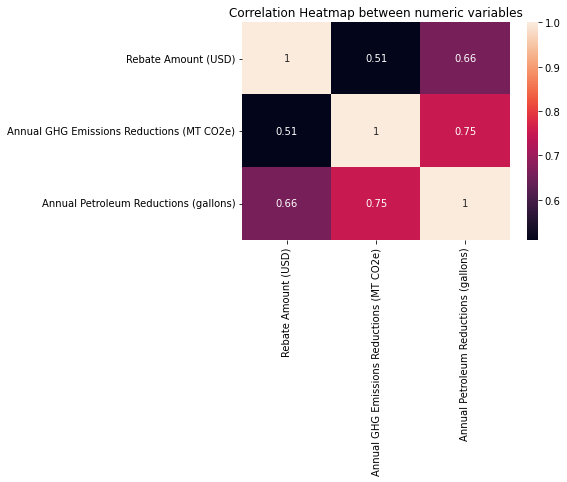

In [42]:
corrmatrix=nysr_cor.corr()
sns.heatmap(corrmatrix, annot=True)
plt.title("Correlation Heatmap between numeric variables")
plt.show()

## **Information about variables and their data types:**

In [43]:
nysr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23174 entries, 0 to 23173
Data columns (total 11 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Data through Date                          23174 non-null  object 
 1   Submitted Date                             23174 non-null  object 
 2   Make                                       23174 non-null  object 
 3   Model                                      23174 non-null  object 
 4   County                                     23174 non-null  object 
 5   ZIP                                        23174 non-null  int64  
 6   EV Type                                    23174 non-null  object 
 7   Transaction Type                           23174 non-null  object 
 8   Annual GHG Emissions Reductions (MT CO2e)  23174 non-null  float64
 9   Annual Petroleum Reductions (gallons)      23174 non-null  float64
 10  Rebate Amount (USD)   

## **Data set summary statistics:**

In [44]:
nysr.describe()

,ZIP,Annual GHG Emissions Reductions (MT CO2e),Annual Petroleum Reductions (gallons),Rebate Amount (USD)
count,23174.000000,23174.000000,23174.000000,23174.000000
mean,12206.410935,2.692061,488.940697,1408.893588
std,1314.792418,0.641441,108.241707,494.254611
min,10001.000000,-0.930000,-7.110000,500.000000
25%,11369.250000,2.650000,440.110000,1100.000000
50%,11788.000000,2.990000,503.600000,1100.000000
75%,13041.000000,3.030000,592.890000,2000.000000
max,14905.000000,3.310000,592.890000,2000.000000


## **Preliminary Visualizations:**

### **Number of vehicles sold per Make:**

In [45]:
number_makes=nysr.groupby(['Make']).size().sort_values()
number_makes

Make
Porsche            10
MINI               17
Volvo              18
Mercedes-Benz      32
Jaguar             35
Audi               41
Smart              94
Volkswagen        100
Subaru            131
Chrysler          206
Mitsubishi        506
Nissan            759
Kia              1016
BMW              1101
Hyundai          1115
Ford             1869
Honda            2087
Chevrolet        3105
Tesla            5128
Toyota           5804
dtype: int64

Text(0, 0.5, 'Count')

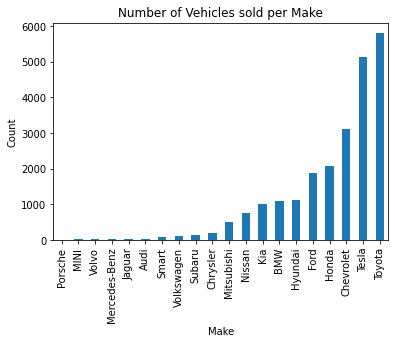

In [46]:
number_makes.plot(kind="bar",title="Number of Vehicles sold per Make")
plt.xlabel("Make")
plt.ylabel("Count")

### **List of models per Make:**

In [47]:
list_models=nysr.groupby('Make')['Model'].unique()
list_models

Make
Audi                                           [e-tron, A3 e-tron]
BMW                         [X5, 740e, 330e, 530e, i3, i3 REx, i8]
Chevrolet                                             [Bolt, Volt]
Chrysler                                                [Pacifica]
Ford                          [Focus, C-MAX Energi, Fusion Energi]
Honda                                                    [Clarity]
Hyundai          [Ionic Plug-In Hybrid, Kona Electric, Ionic_El...
Jaguar                                                    [I-PACE]
Kia                                [Optima Plug-in, Niro, Soul EV]
MINI                                                      [Cooper]
Mercedes-Benz                    [GLE 550e, C350e, GLC350e, B250e]
Mitsubishi                                             [Outlander]
Nissan                                                      [LEAF]
Porsche          [Taycan, Panamera 4 E-Hybrid, Cayenne S E-Hybrid]
Smart            [Electric Fortwo Coupe, Electric Fortwo 

### **Number of Models per Make:**

In [48]:
new1=nysr.groupby('Make')['Model'].nunique().sort_values()
new1

Make
MINI             1
Toyota           1
Subaru           1
Chrysler         1
Honda            1
Nissan           1
Jaguar           1
Mitsubishi       1
Volkswagen       1
Smart            2
Audi             2
Chevrolet        2
Kia              3
Porsche          3
Ford             3
Tesla            3
Volvo            3
Hyundai          4
Mercedes-Benz    4
BMW              7
Name: Model, dtype: int64

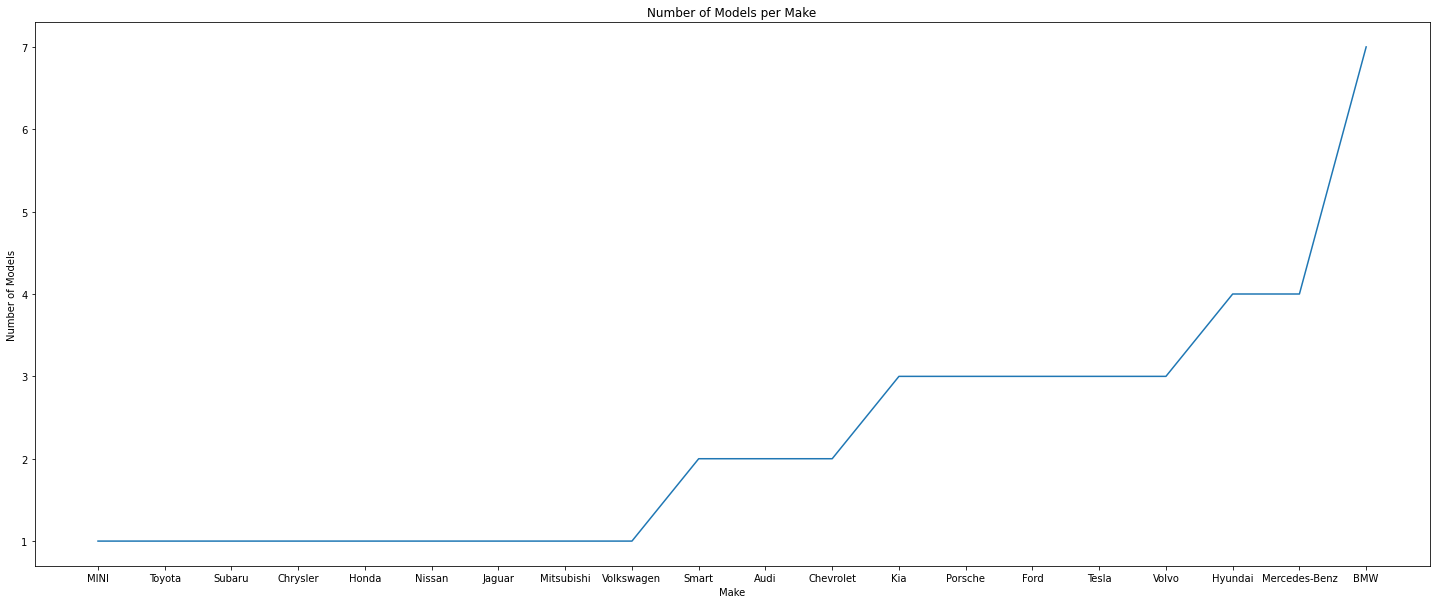

In [49]:
plt.figure(figsize=(25,10))
plt.plot(new1)
plt.title("Number of Models per Make")
plt.xlabel("Make")
plt.ylabel("Number of Models")
plt.show()

### **EV-Type Distribution:**

In [50]:
ev_type=nysr.groupby(['EV Type']).size()
ev_type

EV Type
BEV      8738
PHEV    14436
dtype: int64

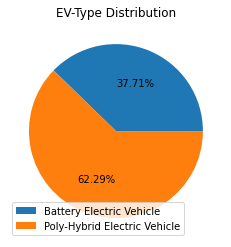

In [51]:
plt.pie(ev_type,autopct='%1.2f%%')
labels = ['Battery Electric Vehicle', 'Poly-Hybrid Electric Vehicle']
plt.legend(labels, loc="lower left")
plt.title("EV-Type Distribution")
plt.show()

### **Transaction type Distribution:**

In [52]:
tr_type=nysr.groupby(['Transaction Type']).size()
tr_type

Transaction Type
Lease        9815
Purchase    13359
dtype: int64

Text(0, 0.5, 'Transaction type')

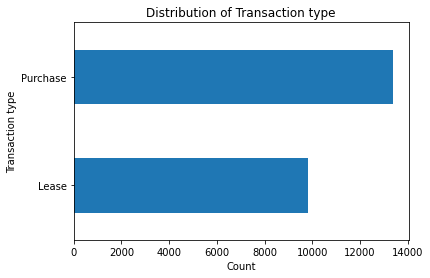

In [53]:
tr_type.plot(kind="barh",title="Distribution of Transaction type")
plt.xlabel("Count")
plt.ylabel("Transaction type")

## **Amount of CO2 emission(MT) reduced by reduction in petroleum usage(gallons)**

Text(0.5, 1.0, 'Amount of CO2 emission(MT) reduced by reduction in petroleum usage(gallons)')

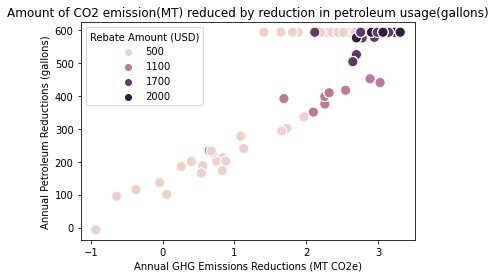

In [54]:
sns.scatterplot(x="Annual GHG Emissions Reductions (MT CO2e)", y="Annual Petroleum Reductions (gallons)",
                s=100,
                hue="Rebate Amount (USD)",
                data=nysr)
plt.title("Amount of CO2 emission(MT) reduced by reduction in petroleum usage(gallons)")

# Feedback acknowledged from Submission 1

## Segmentation of data:
### The data can be segmented based on the target variable - Rebate Amount.

Text(0.5, 0, 'Rebate Amount (USD)')

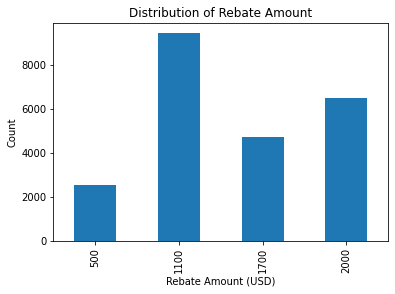

In [55]:
rebate = nysr.groupby(['Rebate Amount (USD)']).size()
rebate.plot(kind="bar", title="Distribution of Rebate Amount")
plt.ylabel("Count")
plt.xlabel("Rebate Amount (USD)")

## Determining presence of Ouliers and Anomolies:
### As there is no outlier observed in the distribution, we can say there is no unusual pattern observed from the plots.

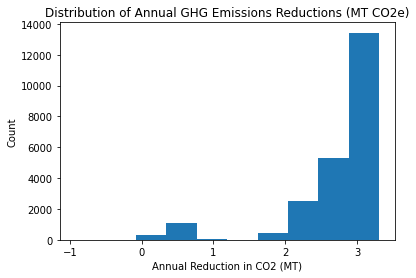

In [56]:
plt.hist(data= nysr, x='Annual GHG Emissions Reductions (MT CO2e)')
plt.ylabel("Count")
plt.xlabel("Annual Reduction in CO2 (MT)")
plt.title("Distribution of Annual GHG Emissions Reductions (MT CO2e)")
plt.show()

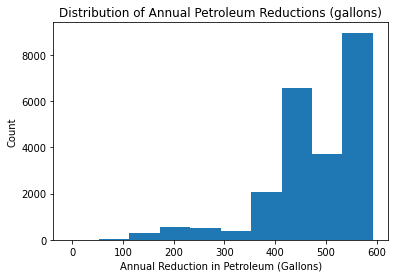

In [57]:
plt.hist(data= nysr, x='Annual Petroleum Reductions (gallons)')
plt.ylabel("Count")
plt.xlabel("Annual Reduction in Petroleum (Gallons)")
plt.title("Distribution of Annual Petroleum Reductions (gallons)")
plt.show()

## SUBMISSION 2


## Transformation steps

###1. Column names to be renamed for ease of use:

In [58]:
nysr1 = nysr.rename(columns={"Annual GHG Emissions Reductions (MT CO2e)": "Reduction_CO2", "Annual Petroleum Reductions (gallons)": "Reduction_Petroleum"})
nysr1

,Data through Date,Submitted Date,Make,Model,County,ZIP,EV Type,Transaction Type,Reduction_CO2,Reduction_Petroleum,Rebate Amount (USD)
0,02/29/2020,01/13/2018,Ford,Focus,Westchester,10598,BEV,Lease,2.76,592.89,1700
1,02/29/2020,09/25/2017,Ford,Focus,Oneida,13601,BEV,Lease,2.76,592.89,1700
2,02/29/2020,04/26/2018,Ford,Focus,Suffolk,11776,BEV,Lease,2.76,592.89,1700
3,02/29/2020,08/30/2017,Ford,Focus,Nassau,11756,BEV,Lease,2.76,592.89,1700
4,02/29/2020,05/29/2018,Ford,Focus,Onondaga,13039,BEV,Purchase,2.76,592.89,1700
...,...,...,...,...,...,...,...,...,...,...,...
23169,02/29/2020,12/27/2017,Volvo,XC60 T8,Onondaga,13039,PHEV,Purchase,0.40,200.58,500
23170,02/29/2020,05/29/2018,Volvo,XC60 T8,Nassau,11791,PHEV,Purchase,0.40,200.58,500
23171,02/29/2020,09/25/2017,Volvo,XC90 T8,Niagara,14094,PHEV,Purchase,0.68,231.77,500
23172,02/29/2020,11/01/2017,Volvo,XC90 T8,Erie,14051,PHEV,Lease,0.68,231.77,500


### 2. Extracted Year from 'Submitted Date'


In [59]:
nysr1[['Month','Date','Year']] = nysr1['Submitted Date'].str.split('/', expand=True)
nysr1

,Data through Date,Submitted Date,Make,Model,County,ZIP,EV Type,Transaction Type,Reduction_CO2,Reduction_Petroleum,Rebate Amount (USD),Month,Date,Year
0,02/29/2020,01/13/2018,Ford,Focus,Westchester,10598,BEV,Lease,2.76,592.89,1700,01,13,2018
1,02/29/2020,09/25/2017,Ford,Focus,Oneida,13601,BEV,Lease,2.76,592.89,1700,09,25,2017
2,02/29/2020,04/26/2018,Ford,Focus,Suffolk,11776,BEV,Lease,2.76,592.89,1700,04,26,2018
3,02/29/2020,08/30/2017,Ford,Focus,Nassau,11756,BEV,Lease,2.76,592.89,1700,08,30,2017
4,02/29/2020,05/29/2018,Ford,Focus,Onondaga,13039,BEV,Purchase,2.76,592.89,1700,05,29,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23169,02/29/2020,12/27/2017,Volvo,XC60 T8,Onondaga,13039,PHEV,Purchase,0.40,200.58,500,12,27,2017
23170,02/29/2020,05/29/2018,Volvo,XC60 T8,Nassau,11791,PHEV,Purchase,0.40,200.58,500,05,29,2018
23171,02/29/2020,09/25/2017,Volvo,XC90 T8,Niagara,14094,PHEV,Purchase,0.68,231.77,500,09,25,2017
23172,02/29/2020,11/01/2017,Volvo,XC90 T8,Erie,14051,PHEV,Lease,0.68,231.77,500,11,01,2017


### 3. Excluded 'Data through Date' column and reordered the columns

In [60]:
nysr1= nysr1[['Submitted Date','Year','Make','Model','County', 'ZIP', 'EV Type', 'Transaction Type', 'Reduction_CO2', 'Reduction_Petroleum', 'Rebate Amount (USD)']]
nysr1

,Submitted Date,Year,Make,Model,County,ZIP,EV Type,Transaction Type,Reduction_CO2,Reduction_Petroleum,Rebate Amount (USD)
0,01/13/2018,2018,Ford,Focus,Westchester,10598,BEV,Lease,2.76,592.89,1700
1,09/25/2017,2017,Ford,Focus,Oneida,13601,BEV,Lease,2.76,592.89,1700
2,04/26/2018,2018,Ford,Focus,Suffolk,11776,BEV,Lease,2.76,592.89,1700
3,08/30/2017,2017,Ford,Focus,Nassau,11756,BEV,Lease,2.76,592.89,1700
4,05/29/2018,2018,Ford,Focus,Onondaga,13039,BEV,Purchase,2.76,592.89,1700
...,...,...,...,...,...,...,...,...,...,...,...
23169,12/27/2017,2017,Volvo,XC60 T8,Onondaga,13039,PHEV,Purchase,0.40,200.58,500
23170,05/29/2018,2018,Volvo,XC60 T8,Nassau,11791,PHEV,Purchase,0.40,200.58,500
23171,09/25/2017,2017,Volvo,XC90 T8,Niagara,14094,PHEV,Purchase,0.68,231.77,500
23172,11/01/2017,2017,Volvo,XC90 T8,Erie,14051,PHEV,Lease,0.68,231.77,500


### 4. Remove Year 2020

In [61]:
nysr1['Year'] = pd.to_numeric(nysr1['Year'])
nysr2 = nysr1.loc[(nysr1['Year'] < 2020)]
nysr2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Submitted Date,Year,Make,Model,County,ZIP,EV Type,Transaction Type,Reduction_CO2,Reduction_Petroleum,Rebate Amount (USD)
0,01/13/2018,2018,Ford,Focus,Westchester,10598,BEV,Lease,2.76,592.89,1700
1,09/25/2017,2017,Ford,Focus,Oneida,13601,BEV,Lease,2.76,592.89,1700
2,04/26/2018,2018,Ford,Focus,Suffolk,11776,BEV,Lease,2.76,592.89,1700
3,08/30/2017,2017,Ford,Focus,Nassau,11756,BEV,Lease,2.76,592.89,1700
4,05/29/2018,2018,Ford,Focus,Onondaga,13039,BEV,Purchase,2.76,592.89,1700
...,...,...,...,...,...,...,...,...,...,...,...
23169,12/27/2017,2017,Volvo,XC60 T8,Onondaga,13039,PHEV,Purchase,0.40,200.58,500
23170,05/29/2018,2018,Volvo,XC60 T8,Nassau,11791,PHEV,Purchase,0.40,200.58,500
23171,09/25/2017,2017,Volvo,XC90 T8,Niagara,14094,PHEV,Purchase,0.68,231.77,500
23172,11/01/2017,2017,Volvo,XC90 T8,Erie,14051,PHEV,Lease,0.68,231.77,500


## Write to CSV the transformations done above:

In [62]:
nysr2.to_csv('drive/MyDrive/DAB103_Google_colab/new_nysr.csv')